In [14]:
# ライブラリをインポート

# データ操作と数値計算のため
import pandas as pd
import numpy as np

# データ可視化のため
import matplotlib.pyplot as plt
import seaborn as sns

# 統計モデリングと計量経済分析のため
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from rdrobust import rdrobust
from rdrobust import rdplot

# for ignore warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
url = "https://www.fbc.keio.ac.jp/~tyabu/keiryo/election_data.csv"
df = pd.read_csv(url)
df.head()

,myoutcomenext,diff_share
0,0.0,0.061488
1,0.0,-0.061488
2,1.0,0.104870
3,0.0,-0.104870
4,0.0,-0.535721


In [23]:
# 変数の定義 ---------------------------------------------------------------------------
df = df.dropna(subset=['diff_share', 'myoutcomenext'])  # Drop rows with NaN in specific columns
df['W'] = df['diff_share']
df['X'] = (df['W'] >= 0).astype(int)
df['Y'] = df['myoutcomenext'].astype(int)
df['W2'] = df['W'] ** 2
df['W3'] = df['W'] ** 3
df['WX'] = df['W'] * df['X']
df['WX2'] = df['W2'] * df['X']
df['WX3'] = df['W3'] * df['X']
df.head()

,myoutcomenext,diff_share,W,X,Y,W2,W3,WX,WX2,WX3
0,0.0,0.061488,0.061488,1,0,0.003781,0.000232,0.061488,0.003781,0.000232
1,0.0,-0.061488,-0.061488,0,0,0.003781,-0.000232,-0.000000,0.000000,-0.000000
2,1.0,0.104870,0.104870,1,1,0.010998,0.001153,0.104870,0.010998,0.001153
3,0.0,-0.104870,-0.104870,0,0,0.010998,-0.001153,-0.000000,0.000000,-0.000000
4,0.0,-0.535721,-0.535721,0,0,0.286997,-0.153750,-0.000000,0.000000,-0.000000


## 14.4節の推定結果

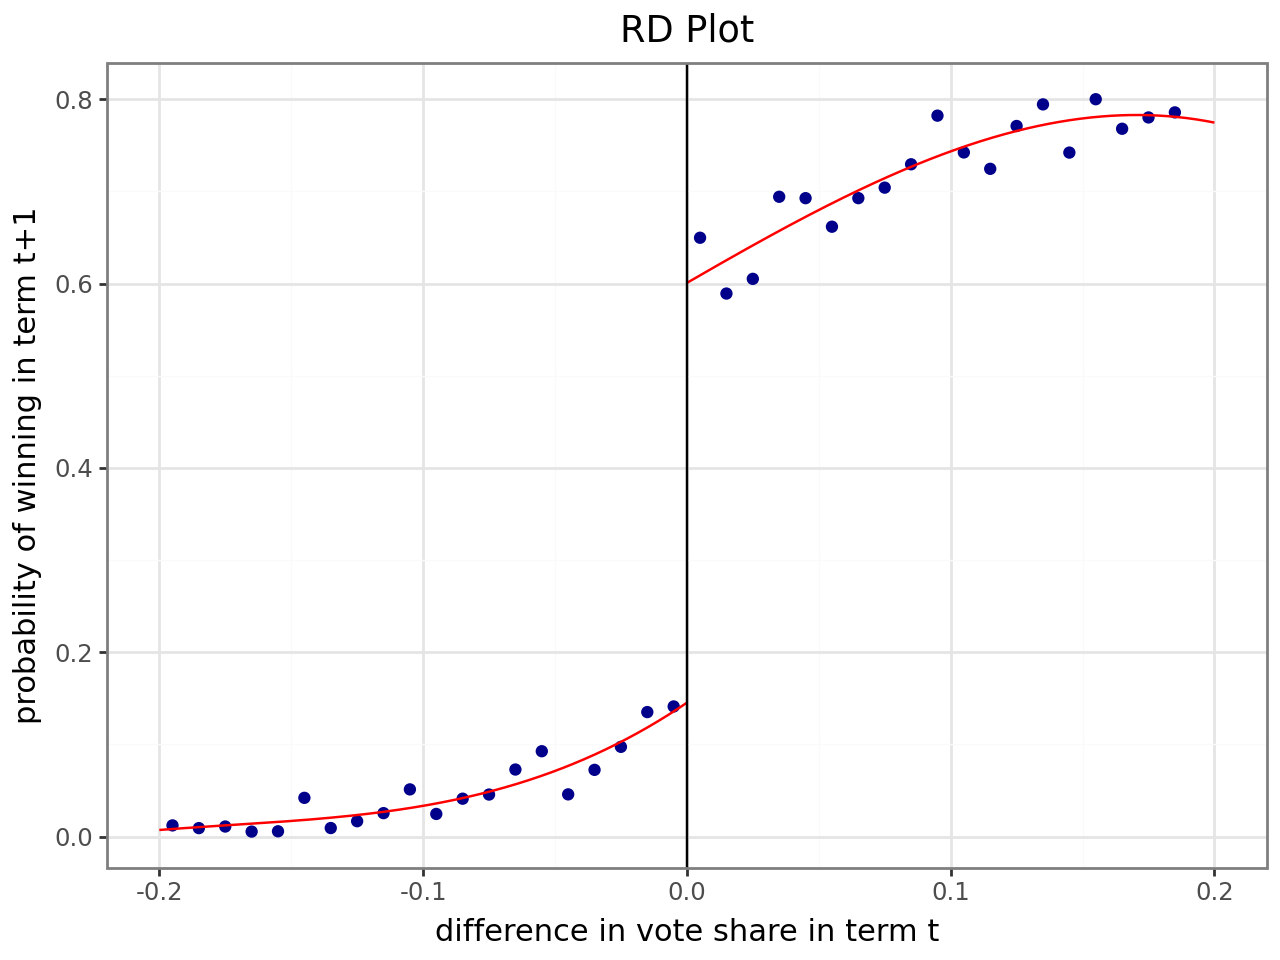

Call: rdplot
Number of Observations:                  7692
Kernel:                               Uniform
Polynomial Order Est. (p):                  3

                                Left      Right
------------------------------------------------
Number of Observations          3853       3839
Number of Effective Obs         3853       3839
Bandwith poly. fit (h)           0.2        0.2
Number of bins scale               1          1
Bins Selected                     20         20
Average Bin Length              0.01       0.01
Median Bin Length               0.01       0.01
IMSE-optimal bins                9.0        6.0
Mimicking Variance bins        100.0       96.0

Relative to IMSE-optimal:
Implied scale                  2.222      3.333
WIMSE variance weight          0.084      0.026
WIMSE bias weight              0.916      0.974


In [28]:
df_filtered = df[(df['W'] >= -0.2) & (df['W'] <= 0.2)]

rdplot(
    df_filtered['Y'], df_filtered['W'], c=0, p=3, nbins=(20, 20),
    x_label="difference in vote share in term t",
    y_label="probability of winning in term t+1"
)

In [12]:
# Filter the DataFrame first
filtered_df = df[(df['W'] >= -0.2) & (df['W'] <= 0.2)]

X1 = filtered_df[['X', 'W', 'W2', 'W3', 'WX', 'WX2', 'WX3']]
X1 = sm.add_constant(X1)
model_1 = sm.OLS(filtered_df['Y'], X1).fit(cov_type='HC1')  # Use filtered_df['Y']
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     1263.
Date:                Wed, 18 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:45:07   Log-Likelihood:                -2770.6
No. Observations:                7692   AIC:                             5557.
Df Residuals:                    7684   BIC:                             5613.
Df Model:                           7                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1453      0.022      6.745      0.0

In [11]:
# 練習問題 ---------------------------------------------------------------------------
# Filter the DataFrame first
filtered_df = df[(df['W'] >= -0.15) & (df['W'] <= 0.15)].copy()  # Create a filtered copy

X2 = filtered_df[['X', 'W', 'WX']]
X2 = sm.add_constant(X2)
model_2 = sm.OLS(filtered_df['Y'], X2).fit(cov_type='HC1')  # Use filtered_df['Y']
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     1779.
Date:                Wed, 18 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:44:41   Log-Likelihood:                -2344.6
No. Observations:                5865   AIC:                             4697.
Df Residuals:                    5861   BIC:                             4724.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1172      0.011     10.796      0.0

In [10]:
# バンド幅と乗数を最適に選択する
rd = rdrobust(df['Y'], df['W'], kernel='tri', c=0)
print(rd)  # This will display the summary directly

Call: rdrobust
Number of Observations:                 24937
Polynomial Order Est. (p):                  1
Polynomial Order Bias (q):                  2
Kernel:                            Triangular
Bandwidth Selection:                    mserd
Var-Cov Estimator:                         NN

                                Left      Right
------------------------------------------------
Number of Observations         14987       9950
Number of Unique Obs.          14834       9942
Number of Effective Obs.        2815       2806
Bandwidth Estimation           0.144      0.144
Bandwidth Bias                 0.371      0.371
rho (h/b)                      0.388      0.388

Method             Coef.     S.E.   t-stat    P>|t|       95% CI      
-------------------------------------------------------------------------
Conventional       0.478    0.025   19.368   1.444e-83     [0.429, 0.526]
Robust                 -        -   17.792   8.118e-71     [0.414, 0.517]

